In [1]:
#Test mayavi
%gui qt
from mayavi import mlab
mlab.test_plot3d()

In [3]:
import numpy as np
import mayavi.mlab


In [60]:
#Generate disparity
!python ./psmnet_origin/submission.py    --loadmodel ./psmnet/models/finetune_300.tar   --datapath ./KITTI/object/testing/ --save_path ./result

Traceback (most recent call last):
  File "./psmnet_origin/submission.py", line 40, in <module>
    from psmnet.dataloader import KITTI_submission_loader as DA
ModuleNotFoundError: No module named 'psmnet'


In [89]:
!python ./preprocessing/generate_lidar.py --calib_dir ./KITTI/object/testing/calib/ --save_dir ./result/psmnet_pl_all    --disparity_dir ./result/psmnet_disp_all --max_high 1

Finish Depth 000000
Finish Depth 000001
Finish Depth 000002
Finish Depth 000003
Finish Depth 000004
Finish Depth 000005
Finish Depth 000006
Finish Depth 000007
Finish Depth 000008
Finish Depth 000009
Finish Depth 000010
Finish Depth 000011
Finish Depth 000012
Finish Depth 000013
Finish Depth 000014
Finish Depth 000015
Finish Depth 000016
Finish Depth 000017
Finish Depth 000018
Finish Depth 000019
Finish Depth 000020
Finish Depth 000021
Finish Depth 000022
Finish Depth 000023
Finish Depth 000024
Finish Depth 000025
Finish Depth 000026
Finish Depth 000027
Finish Depth 000028
Finish Depth 000029
Finish Depth 000030
Finish Depth 000031
Finish Depth 000032
Finish Depth 000033
Finish Depth 000034
Finish Depth 000035
Finish Depth 000036
Finish Depth 000037
Finish Depth 000038
Finish Depth 000039
Finish Depth 000040
Finish Depth 000041
Finish Depth 000042
Finish Depth 000043
Finish Depth 000044
Finish Depth 000045
Finish Depth 000046
Finish Depth 000047
Finish Depth 000048
Finish Depth 000049


In [84]:
!python ./preprocessing/generate_lidar.py --calib_dir ./KITTI/object/testing/calib/ --save_dir ./result/gwcnet12_4d_pseudo     --disparity_dir ./tools/disp_4d   --max_high 1

Finish Depth 000000
Finish Depth 000003
Finish Depth 000007
Finish Depth 000009
Finish Depth 000010
Finish Depth 000011
Finish Depth 000012
Finish Depth 000013
Finish Depth 000014
Finish Depth 000016
Finish Depth 000017
Finish Depth 000018
Finish Depth 000022
Finish Depth 000026
Finish Depth 000029
Finish Depth 000030
Finish Depth 000032
Finish Depth 000034
Finish Depth 000036
Finish Depth 000038
Finish Depth 000041
Finish Depth 000043
Finish Depth 000044
Finish Depth 000045
Finish Depth 000046
Finish Depth 000049
Finish Depth 000051
Finish Depth 000054
Finish Depth 000055
Finish Depth 000056
Finish Depth 000057
Finish Depth 000060
Finish Depth 000064
Finish Depth 000067
Finish Depth 000068
Finish Depth 000069
Finish Depth 000070
Finish Depth 000071
Finish Depth 000072
Finish Depth 000073
Finish Depth 000074
Finish Depth 000075
Finish Depth 000079
Finish Depth 000080
Finish Depth 000082
Finish Depth 000083
Finish Depth 000084
Finish Depth 000085
Finish Depth 000086
Finish Depth 000087


In [3]:
#Visualize
pointcloud = np.fromfile(str("./result/pseudo-lidar_velodyne/000000.bin"), dtype=np.float32, count=-1).reshape([-1,4])

print(pointcloud.shape)
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor


vals='height'
if vals == "height":
    col = z
else:
    col = d

fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     # color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)


(297790, 4)


[[45.47265625 45.32421875 45.16796875 44.99609375 44.8203125  44.671875
  44.51953125 44.359375   44.19921875 44.03125   ]
 [45.47265625 45.328125   45.17578125 45.00390625 44.83203125 44.6796875
  44.52734375 44.37109375 44.2109375  44.04296875]
 [45.4765625  45.33203125 45.17578125 45.00390625 44.8359375  44.69140625
  44.54296875 44.390625   44.23046875 44.0546875 ]
 [45.484375   45.3359375  45.1796875  45.00390625 44.83984375 44.69921875
  44.55859375 44.4140625  44.25       44.0703125 ]
 [45.48828125 45.33984375 45.1796875  45.0078125  44.84375    44.7109375
  44.57421875 44.43359375 44.2734375  44.08203125]
 [45.48046875 45.328125   45.16796875 44.99609375 44.8359375  44.69921875
  44.5625     44.421875   44.26171875 44.0703125 ]
 [45.44921875 45.30078125 45.14453125 44.9765625  44.80859375 44.66796875
  44.52734375 44.37890625 44.21484375 44.03515625]
 [45.421875   45.27734375 45.12109375 44.953125   44.78515625 44.63671875
  44.48828125 44.33203125 44.16796875 44.        ]
 [45

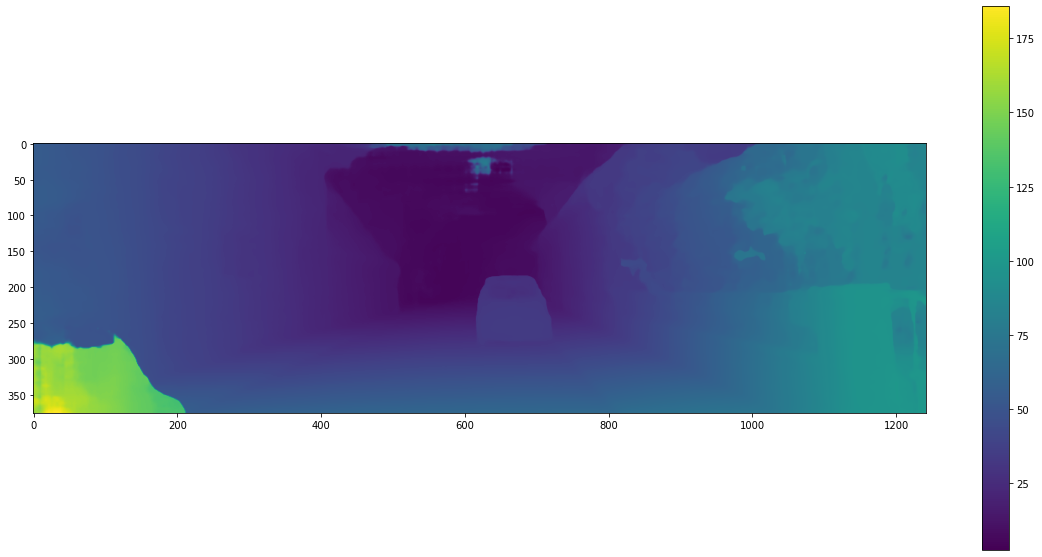

In [23]:
from matplotlib import pyplot as plt

plt.figure(figsize = (20,10))
# disp = plt.imread('./result/psmnet_disparity/000003.png')*256
import imageio
disp = imageio.imread('./result/psmnet_disparity/000003.png')/256
#disp = imageio.imread('./KITTI/object/training/disparity/000003.png')/256
disp = (disp*256).astype(np.uint16)/256
print(disp[200:210,150:160])
print(disp)
plt.imshow(disp, cmap="viridis")
plt.colorbar()
plt.show()

[[44.12109375 44.015625   43.9140625  43.8046875  43.6953125  43.58203125
  43.46875    43.35546875 43.21875    43.0546875 ]
 [44.11328125 44.01171875 43.91015625 43.8046875  43.6953125  43.58203125
  43.46875    43.35546875 43.21875    43.0546875 ]
 [44.109375   44.01171875 43.9140625  43.80859375 43.6953125  43.57421875
  43.453125   43.33203125 43.1953125  43.046875  ]
 [44.109375   44.015625   43.9140625  43.8125     43.6953125  43.56640625
  43.43359375 43.30859375 43.17578125 43.03515625]
 [44.109375   44.015625   43.91796875 43.81640625 43.6953125  43.5546875
  43.41796875 43.28515625 43.15625    43.02734375]
 [44.1171875  44.0234375  43.92578125 43.82421875 43.69921875 43.55859375
  43.41796875 43.28515625 43.15234375 43.0234375 ]
 [44.1328125  44.03515625 43.93359375 43.83203125 43.70703125 43.5703125
  43.4375     43.3046875  43.171875   43.03515625]
 [44.1484375  44.046875   43.9453125  43.8359375  43.71875    43.5859375
  43.453125   43.32421875 43.1875     43.04296875]
 [4

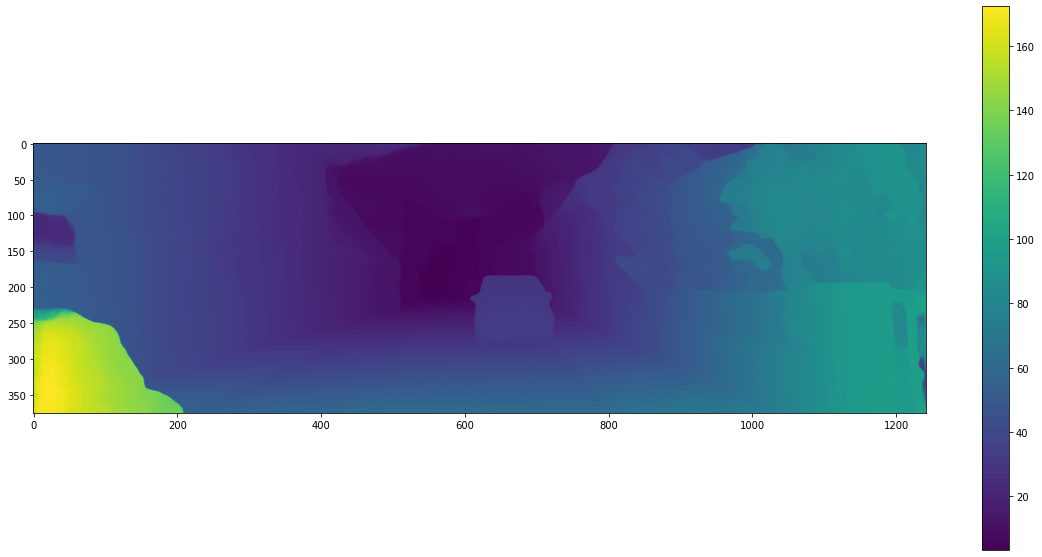

In [47]:
from matplotlib import pyplot as plt

plt.figure(figsize = (20,10))
# disp = plt.imread('./result/psmnet_disparity/000003.png')*256
import imageio
#disp = imageio.imread('./result/gwcnet12_disparity/000003.png')/256
# disp = imageio.imread('/home/maxc303/Kitti/data_scene_flow/training/disp_occ_0/000003_10.png')/256
disp = imageio.imread('/home/maxc303/aer1515/GwcNet/predictions/000003.png')/256
#disp = imageio.imread('/home/maxc303/Kitti/object/training/disp_pl/000003.png')/256

print(disp[200:210,150:160])
plt.imshow(disp, cmap="viridis")
plt.colorbar()
plt.show()

psmnet_disp = imageio.imread('./result/psmnet_disparity/000003.png')/256
gwc_disp = disp


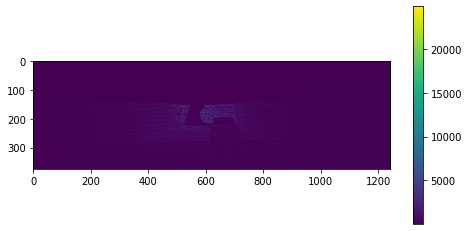

In [12]:
calib_file = './KITTI/object/training/calib/000003.txt'
import sys
sys.path.append('../')
import preprocessing.kitti_util as kitti_util
calib = kitti_util.Calibration(calib_file)
disp[disp < 0] = 0
baseline = 0.54
mask = disp > 0
depth = calib.f_u * baseline / (disp + 1. - mask)
plt.figure(figsize = (8,4))
plt.imshow(depth, cmap="viridis")
plt.colorbar()
plt.show()

[[-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [  45.00077862 -389.630358     44.79390018 -389.630358   -389.630358
    44.5074811  -389.630358   -389.630358   -389.630358     44.24479293]
 [-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [-389.630358     44.99884189 -389.630358   -389.630358     44.76631498
  -389.630358   -389.630358     44.4245183  -389.630358   -389.630358 

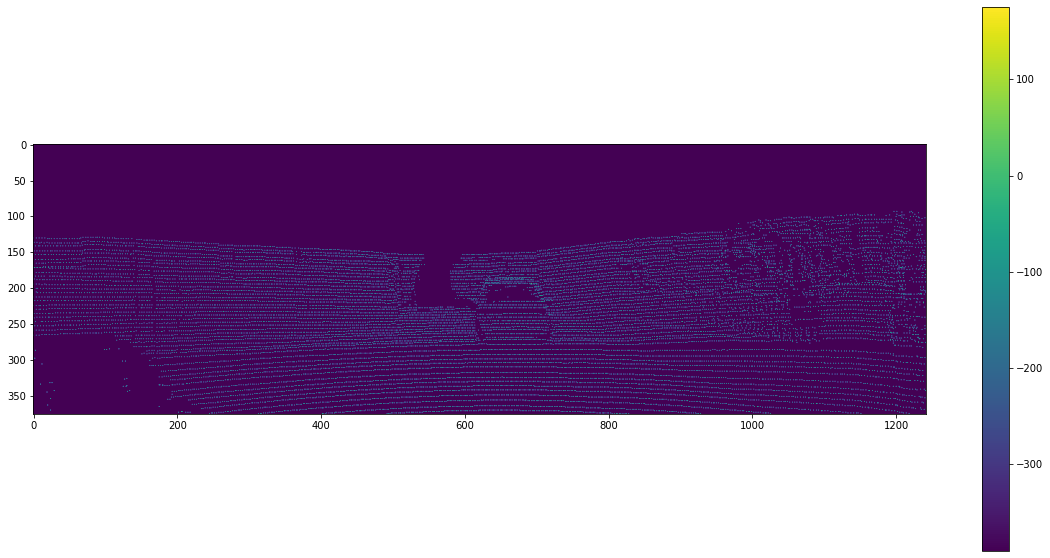

In [13]:
import preprocessing.generate_disp as generate_disp
height, width = depth.shape[:2]
pc_velo = np.fromfile(str("./KITTI/object/training/velodyne/000003.bin"), dtype=np.float32).reshape((-1, 4))[:, :3]

pts_2d = calib.project_velo_to_image(pc_velo)
fov_inds = (pts_2d[:, 0] < width - 1) & (pts_2d[:, 0] >= 0) & \
           (pts_2d[:, 1] < height - 1) & (pts_2d[:, 1] >= 0)
fov_inds = fov_inds & (pc_velo[:, 0] > 2)
imgfov_pc_velo = pc_velo[fov_inds, :]
imgfov_pts_2d = pts_2d[fov_inds, :]
imgfov_pc_rect = calib.project_velo_to_rect(imgfov_pc_velo)
depth_map = np.zeros((height, width)) - 1
imgfov_pts_2d = np.round(imgfov_pts_2d).astype(int)
for i in range(imgfov_pts_2d.shape[0]):
    depth = imgfov_pc_rect[i, 2]
    depth_map[int(imgfov_pts_2d[i, 1]), int(imgfov_pts_2d[i, 0])] = depth
baseline = 0.54
disp_map = (calib.f_u * baseline) / depth_map
print(disp_map[200:210,150:160])

plt.figure(figsize = (20,10))
plt.imshow(disp_map, cmap="viridis")
plt.colorbar()
plt.show()

<Figure size 1440x720 with 0 Axes>

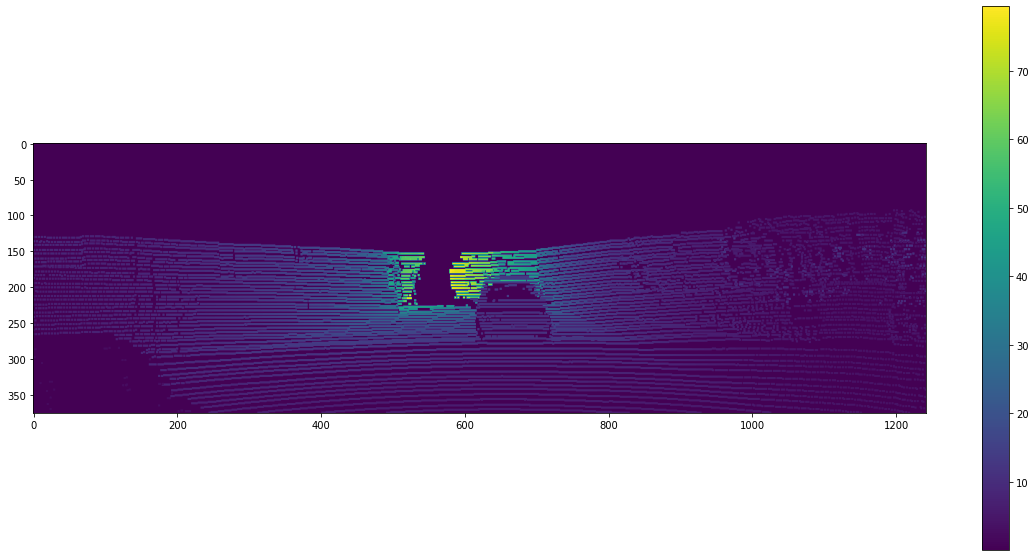

In [76]:
disp_map = np.load('000003.npy')
plt.figure(figsize = (20,10))
mask = disp_map > 0
disp_map = disp_map*mask
import scipy as sp
import scipy.ndimage
disp_map = sp.ndimage.maximum_filter(disp_map,3)

# # disp_map = disp_map*mask
# plt.imshow(disp_map, cmap="viridis")
# plt.colorbar()
# plt.show()

disp_map[disp_map <= 0] = 10000
baseline = 0.54
mask = disp_map > 0
depth_map = calib.f_u * baseline / (disp_map + 1. - mask)
plt.figure(figsize = (20,10))
plt.imshow(depth_map, cmap="viridis")
plt.colorbar()
plt.show()

In [9]:
#Visualize
pointcloud = np.fromfile(str("./KITTI/object/training/velodyne/000003.bin")), dtype=np.float32, count=-1).reshape([-1,4])

print(pointcloud.shape)
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor

vals='height'
if vals == "height":
    col = z
else:
    col = d

fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     # color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)

(122109, 4)


In [88]:
#Script for comparing pseudo lidar and True value.
index = "000009.bin"
#pointcloud = np.fromfile(str("./result/psmnet_pseudo/"+index), dtype=np.float32, count=-1).reshape([-1,4])
pointcloud = np.fromfile(str("./result/gwcnet12_4d_pseudo/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud = np.fromfile(str("./result/gwcnet12_pseudo/"+index), dtype=np.float32, count=-1).reshape([-1,4])
pointcloud1 = np.fromfile(str("./KITTI/object/training/velodyne/"+index), dtype=np.float32, count=-1).reshape([-1,4])
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor

x1 = pointcloud1[:, 0]  # x position of point
y1 = pointcloud1[:, 1]  # y position of point
z1 = pointcloud1[:, 2]  # z position of point
r1 = pointcloud1[:, 3]  # reflectance value of point
d1 = np.sqrt(x1 ** 2 + y1 ** 2)  # Map Distance from sensor
fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     #colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     color=(1, 0, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

mayavi.mlab.points3d(x1, y1, z1,
                     d1,          # Values used for Color
                     mode="point",
                     #colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
x1=np.linspace(5,5,50)
y1=np.linspace(0,0,50)
z1=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)
mayavi.mlab.plot3d(x1,y1,z1)